<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_Arima_prophet_%EB%B9%84%EA%B5%90_%ED%95%98%EC%9D%B4%EB%8B%89%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

## 라이브러리 설치

In [1]:
!pip install finance-datareader
!pip install pykrx

## colab 이용 시 한글 폰트 설정

In [2]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 버전과 위치정보
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [3]:
# 설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔고딕 없음

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/

In [4]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
# 설치확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [6]:
# 나눔 폰트 설치경로
nanum_font

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothi

In [7]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
import matplotlib.pyplot as plt
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.7.11
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [32]:
fm._rebuild()

In [33]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system...')

In [34]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
# 커널 다시시작

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


## 데이터 로드

In [13]:
def money_sur(stock_name, start, end):

  # 라이브러리를 찾음... 한방에 나옴...
    start_date = start
    end_date = end
    sample_code = stock_name

    dataset = fdr.DataReader(sample_code, start = start_date, end = end_date )
    dataset = dataset.reset_index()
    df = stock.get_market_fundamental_by_date(fromdate=start_date, todate=end_date, ticker=sample_code)
    df = df.reset_index()
    df.columns = ['Date','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
    data = pd.merge(dataset, df, on='Date')

    return data

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
hy_df = money_sur('000660', start = '20180101', end = end_date)

hy_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,77300,77300,76200,76600,2014838,0.001307,32990,18.31,2.32,4184,0.78,600
1,2018-01-03,78100,78800,77300,77700,3097644,0.014360,32990,18.57,2.36,4184,0.77,600
2,2018-01-04,78700,79700,77100,77100,3729328,-0.007722,32990,18.43,2.34,4184,0.78,600
3,2018-01-05,78400,79400,78300,79300,3395065,0.028534,32990,18.95,2.40,4184,0.76,600
4,2018-01-08,79500,80000,77400,78200,2960495,-0.013871,32990,18.69,2.37,4184,0.77,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,103500,105500,103000,105000,1999369,0.019417,71275,15.10,1.47,6952,1.11,1170
912,2021-09-13,105000,107000,104000,106500,1923344,0.014286,71275,15.32,1.49,6952,1.10,1170
913,2021-09-14,107500,108500,106500,107500,2463248,0.009390,71275,15.46,1.51,6952,1.09,1170
914,2021-09-15,107500,107500,105500,107500,2933797,0.000000,71275,15.46,1.51,6952,1.09,1170


## ARIMA 모수 설정

In [16]:
df1 = hy_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,76600
1,2018-01-03,77700
2,2018-01-04,77100
3,2018-01-05,79300
4,2018-01-08,78200
...,...,...
911,2021-09-10,105000
912,2021-09-13,106500
913,2021-09-14,107500
914,2021-09-15,107500


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


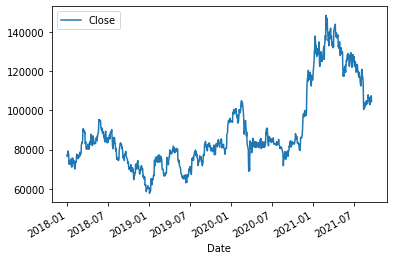

In [17]:
df1.plot('Date','Close')

In [18]:
df1.columns = ['Date', 'Price']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


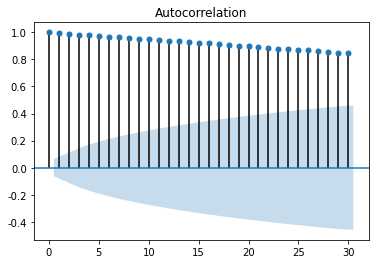

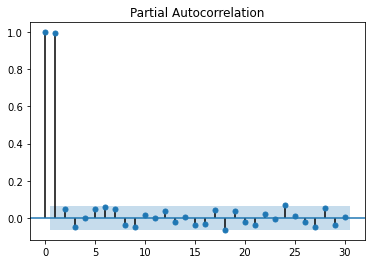

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1.Price)
plot_pacf(df1.Price)
plt.show()

ACF를 보면 완만하지만 꾸준히 줄어드는 것으로 보인다. 또한 PACF는 1의 Time lag에서 약 0.99를 보이고 이후에 급격히 감소한다.

In [20]:
# 시계열 정상성 검정 Augmented Dickey-Fuller Test
# 비정상성 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Price'])

print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -1.4730103910509866
p-value: 0.5468179724571582


1차 차분 및 로그변환

In [21]:
x = df1['Price'].values
x = np.log(x)

diff = x[1:] - x[:-1] # 차분

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


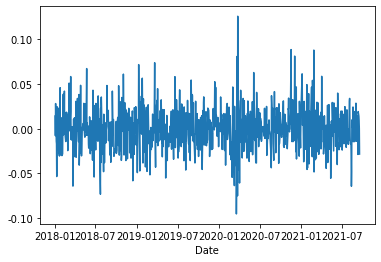

In [22]:
sns.lineplot(df1.iloc[1:, 0], diff)

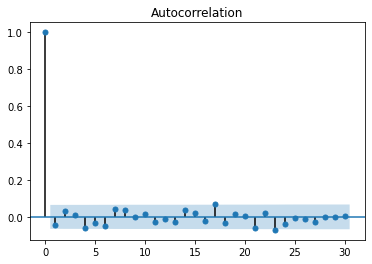

In [23]:
fig = plot_acf(diff)

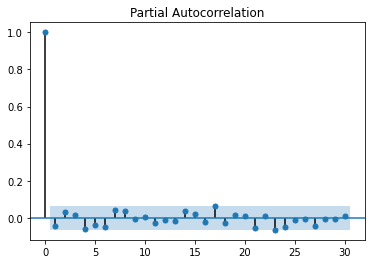

In [24]:
fig = plot_pacf(diff)

In [25]:
result_r = adfuller(diff)

print(f'ADF statistic: {result_r[0]}')
print(f'p-value: {result_r[1]}')  # 1차 차분만으로도 유효한 결과가 나옴

ADF statistic: -31.49183048412155
p-value: 0.0


## Arima model

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# 1,0,1 // 1,1,1 // 1,2,1 // 1,2,2 // 2,2,2 // .... 여러가지 차수를 지정해봤을 때 2,1,2가 최적임
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8317.517
Method:                       css-mle   S.D. of innovations           2145.694
Date:                Thu, 16 Sep 2021   AIC                          16647.034
Time:                        05:56:55   BIC                          16675.947
Sample:                             1   HQIC                         16658.070
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4918     73.335      0.416      0.678    -113.243     174.226
ar.L1.D.y      0.5401      0.215      2.507      0.012       0.118       0.962
ar.L2.D.y     -0.6756      0.126     -5.352      0.0

In [27]:
# const 가 유의하지 않으므로 trend를 nc로해서 다시 모델 적합
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8317.603
Method:                       css-mle   S.D. of innovations           2145.896
Date:                Thu, 16 Sep 2021   AIC                          16645.207
Time:                        05:56:58   BIC                          16669.301
Sample:                             1   HQIC                         16654.404
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.5410      0.216      2.505      0.012       0.118       0.964
ar.L2.D.y     -0.6752      0.126     -5.355      0.000      -0.922      -0.428
ma.L1.D.y     -0.5774      0.195     -2.956      0.0

In [28]:
# 학습, 테스트 데이터 분리
train = df1[:-10]
test = df1[-10:]

In [29]:
model = ARIMA(train.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  905
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8228.294
Method:                       css-mle   S.D. of innovations           2149.674
Date:                Thu, 16 Sep 2021   AIC                          16466.588
Time:                        05:57:04   BIC                          16490.628
Sample:                             1   HQIC                         16475.769
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.5071      0.180      2.818      0.005       0.154       0.860
ar.L2.D.y     -0.6873      0.138     -4.986      0.000      -0.958      -0.417
ma.L1.D.y     -0.5458      0.163     -3.352      0.0

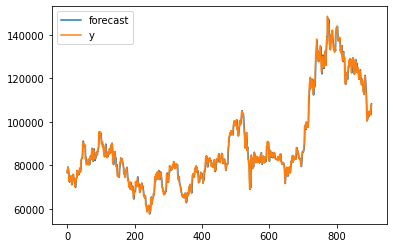

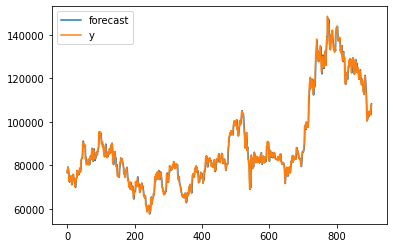

In [30]:
model_fit.plot_predict()

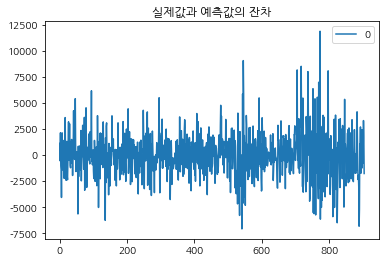

In [35]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [36]:
fore = model_fit.forecast(steps=10) # 10일 예측
print(fore)

(array([106980.96603601, 106904.58451813, 106535.26000907, 106400.45975317,
       106585.94892172, 106772.67239349, 106739.87347939, 106594.89685406,
       106543.9169888 , 106617.71140307]), array([2149.67433638, 2981.90394337, 3695.62739295, 4352.53762501,
       4912.70424372, 5377.73648205, 5793.87365442, 6198.38206441,
       6593.3011584 , 6962.97180265]), array([[102767.68175822, 111194.2503138 ],
       [101060.16018376, 112749.0088525 ],
       [ 99291.96341862, 113778.55659952],
       [ 97869.6427668 , 114931.27673953],
       [ 96957.22553733, 116214.67230611],
       [ 96232.50257033, 117312.84221666],
       [ 95384.08978575, 118095.65717303],
       [ 94446.29124541, 118743.50246272],
       [ 93621.2841791 , 119466.5497985 ],
       [ 92970.53744451, 120264.88536163]]))


## Arima 결과

In [37]:
# 마지막 10일의 예측 데이터
pred_arima_y = fore[0].tolist()

# 실제 10일의 데이터 
test_y = test.Price.values

# 신뢰구간
# 마지막 10일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in fore[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

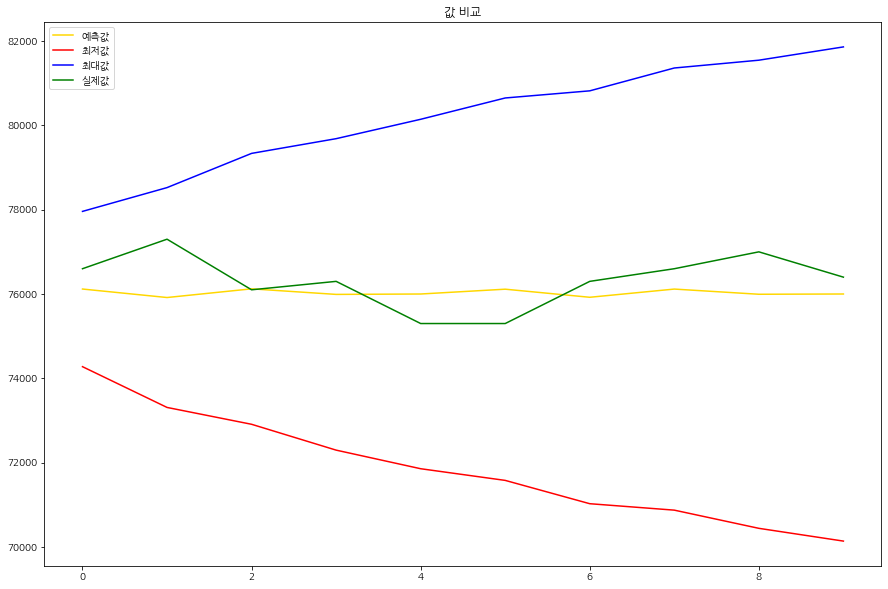

In [ ]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))
print(rmse_arima)

1655.2411046840418


# Prophet

## 데이터 로드

In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
hy_df = money_sur('000660', start = '20180101', end = end_date)

hy_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,77300,77300,76200,76600,2014838,0.001307,32990,18.31,2.32,4184,0.78,600
1,2018-01-03,78100,78800,77300,77700,3097644,0.014360,32990,18.57,2.36,4184,0.77,600
2,2018-01-04,78700,79700,77100,77100,3729328,-0.007722,32990,18.43,2.34,4184,0.78,600
3,2018-01-05,78400,79400,78300,79300,3395065,0.028534,32990,18.95,2.40,4184,0.76,600
4,2018-01-08,79500,80000,77400,78200,2960495,-0.013871,32990,18.69,2.37,4184,0.77,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,103500,105500,103000,105000,1999369,0.019417,71275,15.10,1.47,6952,1.11,1170
912,2021-09-13,105000,107000,104000,106500,1923344,0.014286,71275,15.32,1.49,6952,1.10,1170
913,2021-09-14,107500,108500,106500,107500,2463248,0.009390,71275,15.46,1.51,6952,1.09,1170
914,2021-09-15,107500,107500,105500,107500,2933797,0.000000,71275,15.46,1.51,6952,1.09,1170


## Prophet 모델 실습

- Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다.
- fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피쳐를 'ds'와 'y'로 변경해야 한다. 
  - sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터
    - Additive는 데이터의 진폭이 일정함을 의미하고, Multiplicative는 데이터의 진폭이 점점 증가하거나 감소하는 것을 뜻함
  - changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터. 수치가 높을수록 모델은 과적합에 가까워진다.

In [40]:
df1 = hy_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,76600
1,2018-01-03,77700
2,2018-01-04,77100
3,2018-01-05,79300
4,2018-01-08,78200
...,...,...
911,2021-09-10,105000
912,2021-09-13,106500
913,2021-09-14,107500
914,2021-09-15,107500


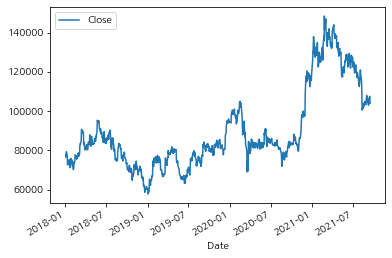

In [41]:
df1.plot('Date','Close')

In [42]:
df1.columns = ['ds', 'y']

In [43]:
# train, test
train = df1[:-10]
test = df1[-10:]

In [45]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.6)

prophet.fit(train)

In [46]:
# 10일단위로 예측값을 가져옴
future_data = prophet.make_future_dataframe(periods = 10, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
906,2021-09-03,104710.773216,100053.176006,109160.120404
907,2021-09-04,89315.361986,84965.314559,93475.573491
908,2021-09-05,89365.388341,84878.949188,93697.330382
909,2021-09-06,104504.590186,99950.408881,108615.413967
910,2021-09-07,104961.054171,100563.618322,109233.874966
911,2021-09-08,104788.234705,100305.026546,108801.061881
912,2021-09-09,104948.502481,100327.935757,109050.666703
913,2021-09-10,104788.443305,100422.334084,109020.581339
914,2021-09-11,89359.021050,85372.959853,93548.455151
915,2021-09-12,89291.921826,84614.272011,93944.345094


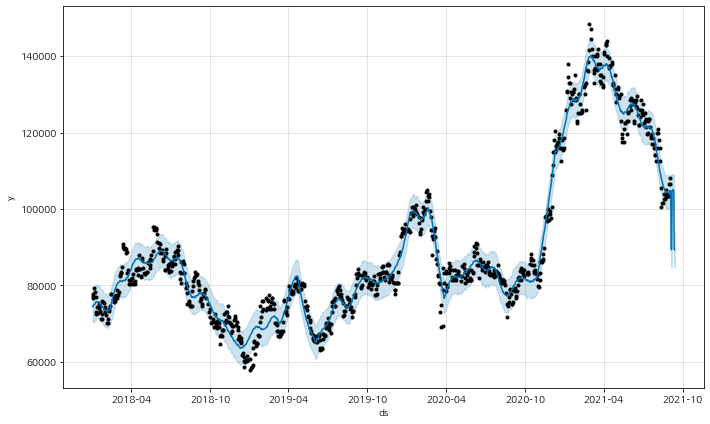

In [47]:
fig1 = prophet.plot(forecast_data)

그래프는 fbprophet에서 제공하는 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능

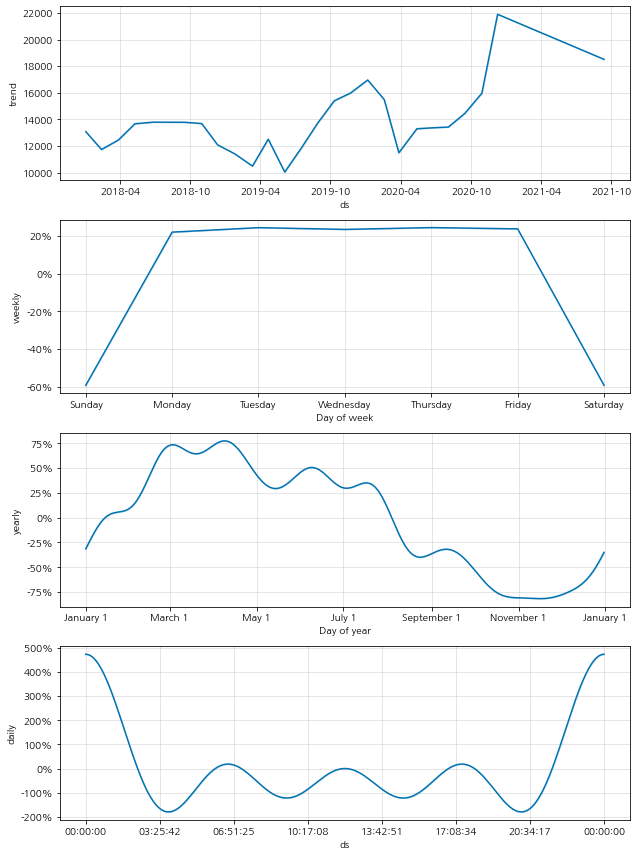

In [48]:
fig2 = prophet.plot_components(forecast_data)

## 결과

In [49]:
# test
test.y.values

array([107000, 106000, 104500, 106000, 103000, 105000, 106500, 107500,
       107500, 104000])

Text(0.5, 1.0, '값 비교')

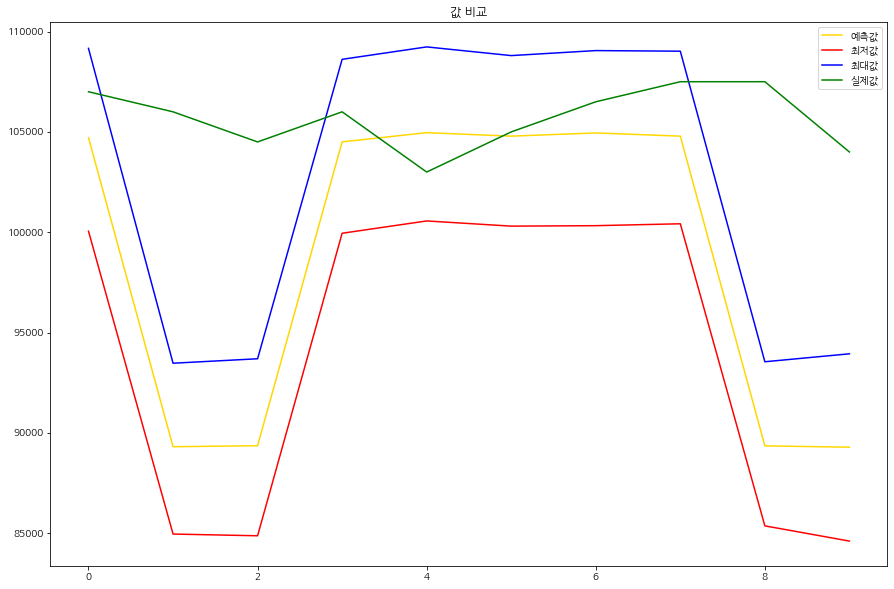

In [50]:
plt.figure(figsize=(15, 10))

# 마지막 10일의 예측 데이터
pred_fbprophet_y = forecast_data.yhat.values[-10:]

# 실제 10일의 데이터 
test_y = test.y.values

# 마지막 10일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-10:]
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-10:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [51]:
pred_fbprophet_y

array([104710.77321631,  89315.3619856 ,  89365.3883407 , 104504.5901864 ,
       104961.05417068, 104788.23470526, 104948.5024807 , 104788.44330536,
        89359.02104982,  89291.92182603])

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

prophet_arima = sqrt(mean_squared_error(pred_fbprophet_y, test_y))
print(prophet_arima)

10363.316885200356


## 모델 비교

In [53]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})
df

,ARIMA 예측값,FBprophet 예측값,실제값
0,106980.966036,104710.773216,107000
1,106904.584518,89315.361986,106000
2,106535.260009,89365.388341,104500
3,106400.459753,104504.590186,106000
4,106585.948922,104961.054171,103000
5,106772.672393,104788.234705,105000
6,106739.873479,104948.502481,106500
7,106594.896854,104788.443305,107500
8,106543.916989,89359.021050,107500
9,106617.711403,89291.921826,104000


Text(0.5, 1.0, '값 비교')

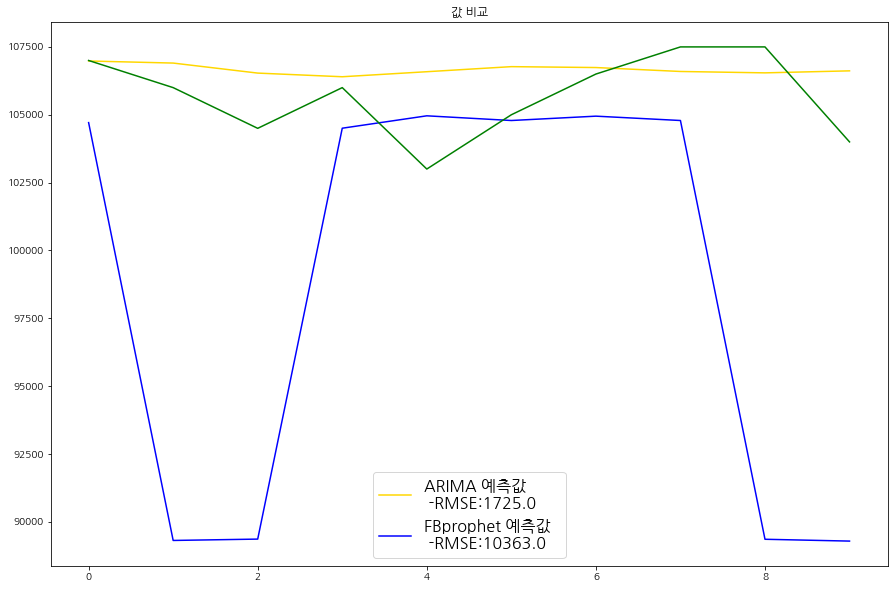

In [54]:
plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'blue')


# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0))])
plt.title("값 비교")